In [72]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing

import xgboost as xgb
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

In [73]:
dados = pd.read_csv("dados_pre_processados.csv")
dados.drop("Unnamed: 0", axis = "columns", inplace=True)
dados.head()

,CodigoReceita,TipoLancamento,DataEmissaoNotaFiscal,CodigoCliente,CodigoMotorista,TempoPermanenciaObra,Idade,TipoTraco,CodigoAglomerante,FCK,Rompimento7Dias,Rompimento28Dias,UsaCimentoPuro,ResultadoProjetado,PercentualCrescimentoReal,PercentualCrescimentoProjetado,RelacaoAguaCimento
0,672051,B,2015-01-16 07:35:31.770,6248051,11080,02:41:00,28,N,12051.0,30.0,20.83,31.81,0,33.321754,52.712434,59.970014,0.535294
1,672051,B,2015-01-16 08:20:03.153,6248051,87079,02:46:00,28,N,12051.0,30.0,19.62,31.21,0,31.799067,59.072375,62.074756,0.535294
2,672051,B,2015-01-16 10:05:20.293,6248051,43080,01:32:00,28,N,12051.0,30.0,21.97,36.68,0,34.733698,66.954939,58.096029,0.535294
3,672051,B,2015-01-20 18:52:57.373,12343051,43080,01:10:00,28,N,12051.0,30.0,28.21,40.21,0,42.118539,42.538107,49.303577,0.535294
4,672051,B,2015-01-21 07:08:54.847,6248051,42080,00:35:00,28,N,12051.0,30.0,25.80,38.74,0,39.330637,50.155039,52.444329,0.535294


In [74]:
#10051
#112051
#111051
#17051
#11051
#108051

In [75]:
dados.sort_values("DataEmissaoNotaFiscal", ascending = False).head(15)

,CodigoReceita,TipoLancamento,DataEmissaoNotaFiscal,CodigoCliente,CodigoMotorista,TempoPermanenciaObra,Idade,TipoTraco,CodigoAglomerante,FCK,Rompimento7Dias,Rompimento28Dias,UsaCimentoPuro,ResultadoProjetado,PercentualCrescimentoReal,PercentualCrescimentoProjetado,RelacaoAguaCimento
59987,51553051,B,2020-12-17 16:55:58.597,9301051,209079,00:25:00,28,E,10051.0,35.0,31.95,41.83,1,43.710086,30.923318,36.807782,0.500000
59657,50487051,B,2020-12-17 16:42:18.753,134214051,1023051,02:07:00,28,N,112051.0,30.0,26.63,37.92,1,37.039539,42.395794,39.089519,0.692547
59656,50487051,B,2020-12-17 11:16:36.790,134214051,1028051,00:35:00,28,N,112051.0,30.0,28.97,38.89,1,39.747447,34.242320,37.202095,0.692547
62733,51142051,B,2020-12-17 10:12:25.113,10581051,49079,01:06:00,28,N,111051.0,35.0,26.66,33.56,1,35.978079,25.881470,34.951533,0.628834
60229,52217051,B,2020-12-17 09:47:36.027,83749998,204079,00:38:00,28,E,17051.0,30.0,28.90,37.83,1,37.542653,30.899654,29.905372,0.515152
61720,54646051,B,2020-12-17 09:07:08.730,9301051,113079,00:17:00,28,E,17051.0,35.0,34.12,44.72,1,43.046175,31.066823,26.161122,0.500000
61607,53776051,B,2020-12-17 08:05:51.807,117500998,194079,00:26:00,28,E,11051.0,25.0,23.14,31.15,1,31.979368,34.615385,38.199516,0.498584
61606,53776051,B,2020-12-17 06:53:04.283,117500998,8148,01:16:00,28,E,11051.0,25.0,19.24,26.61,1,27.477730,38.305613,42.815644,0.498584
60737,52507051,C,2020-12-16 16:22:12.310,363342998,107079,00:17:00,28,E,17051.0,25.0,25.22,33.34,1,33.536743,32.196669,32.976778,0.662021
62279,15671051,B,2020-12-16 15:48:47.380,121082998,113079,00:22:00,28,E,10051.0,25.0,23.23,30.97,1,33.594438,33.318984,44.616609,0.549865


In [77]:
dados_por_aglomerante = dados.groupby("CodigoAglomerante")
#dados_por_aglomerante.groups

In [138]:
da = dados_por_aglomerante.get_group(17051.0)
da.head()

,CodigoReceita,TipoLancamento,DataEmissaoNotaFiscal,CodigoCliente,CodigoMotorista,TempoPermanenciaObra,Idade,TipoTraco,CodigoAglomerante,FCK,Rompimento7Dias,Rompimento28Dias,UsaCimentoPuro,ResultadoProjetado,PercentualCrescimentoReal,PercentualCrescimentoProjetado,RelacaoAguaCimento
2136,16269051,B,2015-01-07 07:25:52.677,76272051,68079,00:44:00,28,N,17051.0,25.0,22.12,32.09,1,31.536740,45.072333,42.571159,0.549451
3157,16331051,B,2015-01-13 08:18:59.420,9984051,95079,00:35:00,28,N,17051.0,30.0,24.45,32.27,1,34.572160,31.983640,41.399426,0.542553
3158,16331051,B,2015-01-14 07:13:18.220,9984051,33080,00:58:00,28,N,17051.0,30.0,23.09,31.40,1,32.803738,35.989606,42.069024,0.493181
3159,16331051,B,2015-01-14 07:55:19.473,9984051,61079,00:59:00,28,N,17051.0,30.0,29.39,38.23,1,40.924500,30.078258,39.246343,0.493181
3160,16331051,B,2015-01-14 10:07:02.943,9984051,102079,00:26:00,28,N,17051.0,30.0,32.17,39.12,1,44.455369,21.603979,38.188898,0.493181


In [139]:
fig = px.box(da, x="TipoLancamento", y="PercentualCrescimentoReal", title='Tipo de Lançamento x Percentual Crescimento')
fig.show()

In [140]:
fig = px.box(da, x="TipoTraco", y="PercentualCrescimentoReal", title='Tipo de Traço x Percentual Crescimento')
fig.show()

In [141]:
fig = px.box(da, x="FCK", y="PercentualCrescimentoReal", title='FCK x Percentual Crescimento')
fig.show()

In [142]:
fig = px.scatter(da, x="Rompimento7Dias", y="PercentualCrescimentoReal", title='Rompimento 7 Dias x Percentual Crescimento')
fig.show()

In [143]:
fig = px.scatter(da, x="RelacaoAguaCimento", y="PercentualCrescimentoReal", title='Relação Água Cimento x Percentual Crescimento')
fig.show()

In [144]:
fig = px.scatter(da, x="TempoPermanenciaObra", y="PercentualCrescimentoReal", title='Tempo Permanência Obra x Percentual Crescimento')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

<AxesSubplot:>

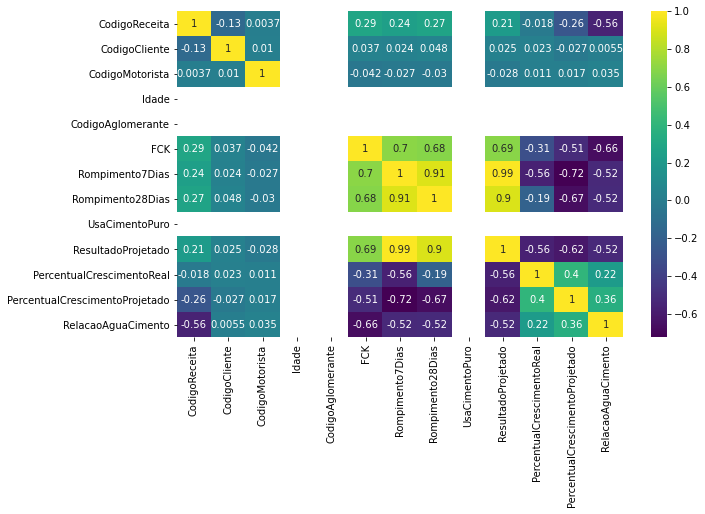

In [145]:
features_numericas = da.select_dtypes(include=['int', 'float'])

k = features_numericas.shape[1] #number of variables for heatmap
cols = da.corr().index
cm = da[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [146]:
da.head()

,CodigoReceita,TipoLancamento,DataEmissaoNotaFiscal,CodigoCliente,CodigoMotorista,TempoPermanenciaObra,Idade,TipoTraco,CodigoAglomerante,FCK,Rompimento7Dias,Rompimento28Dias,UsaCimentoPuro,ResultadoProjetado,PercentualCrescimentoReal,PercentualCrescimentoProjetado,RelacaoAguaCimento
2136,16269051,B,2015-01-07 07:25:52.677,76272051,68079,00:44:00,28,N,17051.0,25.0,22.12,32.09,1,31.536740,45.072333,42.571159,0.549451
3157,16331051,B,2015-01-13 08:18:59.420,9984051,95079,00:35:00,28,N,17051.0,30.0,24.45,32.27,1,34.572160,31.983640,41.399426,0.542553
3158,16331051,B,2015-01-14 07:13:18.220,9984051,33080,00:58:00,28,N,17051.0,30.0,23.09,31.40,1,32.803738,35.989606,42.069024,0.493181
3159,16331051,B,2015-01-14 07:55:19.473,9984051,61079,00:59:00,28,N,17051.0,30.0,29.39,38.23,1,40.924500,30.078258,39.246343,0.493181
3160,16331051,B,2015-01-14 10:07:02.943,9984051,102079,00:26:00,28,N,17051.0,30.0,32.17,39.12,1,44.455369,21.603979,38.188898,0.493181


In [147]:
fig = px.box(da, x="TempoPermanenciaObra", title='FCK x Percentual Crescimento')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [148]:
def ClassificarTempoPermanenciaObra(item):
    if (item["TempoPermanenciaObra"] <= '00:30:00'):
        return 1
    elif (item["TempoPermanenciaObra"] <= '01:00:00'):
        return 2
    elif (item["TempoPermanenciaObra"] <= '01:30:00'):
        return 3
    elif (item["TempoPermanenciaObra"] <= '02:00:00'):
        return 4
    else:
        return 5

In [149]:
#da["ClassificacaoTempoPermanenciaObra"] = da.apply(ClassificarTempoPermanenciaObra, axis = "columns")

In [150]:
dados_finais = da[["CodigoReceita", "TipoLancamento", "TipoTraco", "FCK", "RelacaoAguaCimento", "Rompimento7Dias", "PercentualCrescimentoReal"]]

In [151]:
dados_finais["TipoLancamento"].replace('C', 0, inplace = True)
dados_finais["TipoLancamento"].replace('B', 1, inplace = True)

dados_finais["TipoTraco"].replace('N', 0, inplace = True)
dados_finais["TipoTraco"].replace('E', 1, inplace = True)

/home/marina/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [152]:
dados_finais.columns = ['CodigoReceita', 'EhLancamentoBombeavel', 'EhTracoEspecial', 'FCK', 'RelacaoAguaCimento',
       'Rompimento7Dias', 'PercentualCrescimentoReal']

In [153]:
dados_finais.head()

,CodigoReceita,EhLancamentoBombeavel,EhTracoEspecial,FCK,RelacaoAguaCimento,Rompimento7Dias,PercentualCrescimentoReal
2136,16269051,1,0,25.0,0.549451,22.12,45.072333
3157,16331051,1,0,30.0,0.542553,24.45,31.983640
3158,16331051,1,0,30.0,0.493181,23.09,35.989606
3159,16331051,1,0,30.0,0.493181,29.39,30.078258
3160,16331051,1,0,30.0,0.493181,32.17,21.603979


In [154]:
dados_finais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2394 entries, 2136 to 62887
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CodigoReceita              2394 non-null   int64  
 1   EhLancamentoBombeavel      2394 non-null   int64  
 2   EhTracoEspecial            2394 non-null   int64  
 3   FCK                        2394 non-null   float64
 4   RelacaoAguaCimento         2394 non-null   float64
 5   Rompimento7Dias            2394 non-null   float64
 6   PercentualCrescimentoReal  2394 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 149.6 KB


In [155]:
class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):        
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])
    
class Debug(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):        
        print(X)

modelo = Pipeline([
  ('features', FeatureUnion(
      transformer_list=[
          ('numericals', Pipeline([
              ('selector', TypeSelector(np.number)),
              ('scaler', MinMaxScaler())
          ]))
      ]
  )),
  ('model', LinearRegression())
])

In [156]:
X = dados_finais.drop("PercentualCrescimentoReal", axis=1)
Y = dados_finais["PercentualCrescimentoReal"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 123)
modelo.fit(x_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numericals',
                                                 Pipeline(steps=[('selector',
                                                                  TypeSelector(dtype=<class 'numpy.number'>)),
                                                                 ('scaler',
                                                                  MinMaxScaler())]))])),
                ('model', LinearRegression())])

In [157]:
y_pred = modelo.predict(x_test)

In [158]:
dados_teste = da.loc[y_test.index]
y_proj = dados_teste["PercentualCrescimentoProjetado"]

In [159]:
j = 0

resultado_final = []

for i in y_test.index:
    diff_real_proj = (y_test[i] - y_proj[i])/y_test[i]
    diff_real_pred = (y_test[i] - y_pred[j])/y_test[i]
    
    if (diff_real_proj <= diff_real_pred):
        resultado_final.append('ModeloAntigo')
    else:
        resultado_final.append('ModeloNovo')
        
    j = j + 1

In [160]:
resultado_final.count('ModeloNovo')

453

In [161]:
resultado_final.count('ModeloAntigo')

266

In [162]:
modelo_arvore = Pipeline([
  ('features', FeatureUnion(
      transformer_list=[
          ('numericals', Pipeline([
              ('selector', TypeSelector(np.number)),
              ('scaler', MinMaxScaler())
          ]))
      ]
  )),
  ('model', GradientBoostingRegressor())
])

In [163]:
modelo_arvore.fit(x_train, y_train)
y_pred_arvore = modelo_arvore.predict(x_test)

In [164]:
j = 0

resultado_final_arvore = []

for i in y_test.index:
    diff_real_proj = (y_test[i] - y_proj[i])/y_test[i]
    diff_real_pred = (y_test[i] - y_pred_arvore[j])/y_test[i]
    
    if (diff_real_proj <= diff_real_pred):
        resultado_final_arvore.append('ModeloAntigo')
    else:
        resultado_final_arvore.append('ModeloNovo')
        
    j = j + 1

In [165]:
resultado_final_arvore.count('ModeloNovo')

446

In [166]:
resultado_final_arvore.count('ModeloAntigo')

273